In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [5]:
train_path = 'D:/thesis_work/fruits/Fruits Classification/train'
test_path = 'D:/thesis_work/fruits/Fruits Classification/test'
val_path = 'D:/thesis_work/fruits/Fruits Classification/valid'

In [6]:
img_width, img_height = 200, 200
batch_size = 32
epochs = 50

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(directory=train_path,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

Found 9700 images belonging to 5 classes.


In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(directory=test_path,
                                                  target_size=(img_width, img_height),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

Found 100 images belonging to 5 classes.


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(Dense(train_generator.num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [10]:
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=epochs,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // batch_size)

Epoch 1/50
303/303 [==============================] - 144s 465ms/step - loss: 1.2510 - accuracy: 0.4491 - val_loss: 0.9757 - val_accuracy: 0.5521
Epoch 2/50
303/303 [==============================] - 44s 145ms/step - loss: 1.0726 - accuracy: 0.5514 - val_loss: 0.9816 - val_accuracy: 0.6458
Epoch 3/50
303/303 [==============================] - 44s 145ms/step - loss: 1.0190 - accuracy: 0.5825 - val_loss: 0.9049 - val_accuracy: 0.5938
Epoch 4/50
303/303 [==============================] - 45s 148ms/step - loss: 0.9675 - accuracy: 0.6123 - val_loss: 0.7986 - val_accuracy: 0.6667
Epoch 5/50
303/303 [==============================] - 45s 149ms/step - loss: 0.9262 - accuracy: 0.6261 - val_loss: 0.9116 - val_accuracy: 0.6250
Epoch 6/50
303/303 [==============================] - 44s 147ms/step - loss: 0.8800 - accuracy: 0.6571 - val_loss: 0.8614 - val_accuracy: 0.6667
Epoch 7/50
303/303 [==============================] - 45s 147ms/step - loss: 0.8316 - accuracy: 0.6770 - val_loss: 0.7601 - val_a

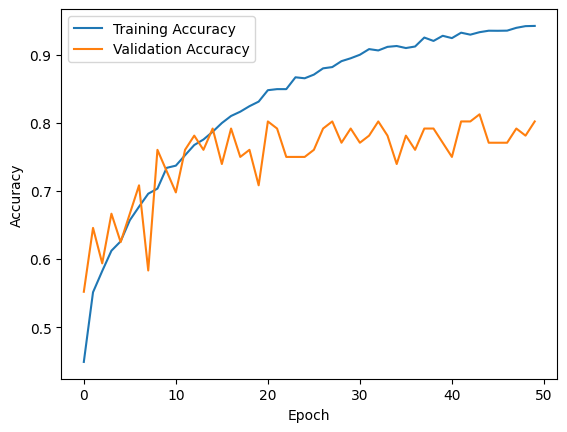

In [11]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

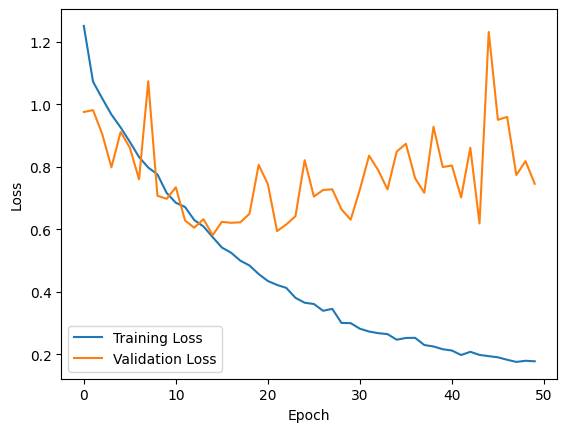

In [14]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#Class of Fruits:
# 0 -- Apple
# 1 -- Banana
# 2 -- Grape
# 3 -- Mango
# 4 -- Strawberry

In [ ]:
# Predict Mango
def predict_single_image(image_path):
    img = image.load_img(image_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    plt.title(f'Predicted Class: {predicted_class}')
    plt.imshow(img)
    print(f"Predicted Class: {predicted_class}")

predict_single_image('/content/drive/MyDrive/Fruits/test/Mango/Mango (1477).jpeg')

In [ ]:
# Predict Banana
def predict_single_image(image_path):
    img = image.load_img(image_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    plt.title(f'Predicted Class: {predicted_class}')
    plt.imshow(img)
    print(f"Predicted Class: {predicted_class}")

predict_single_image('/content/drive/MyDrive/Fruits/test/Banana/Banana (2044).jpeg')

In [ ]:
# Predict Apple
def predict_single_image(image_path):
    img = image.load_img(image_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    plt.title(f'Predicted Class: {predicted_class}')
    plt.imshow(img)
    print(f"Predicted Class: {predicted_class}")

predict_single_image('/content/drive/MyDrive/Fruits/train/Apple/Apple (1).jpeg')

In [ ]:
# Predict Grape
def predict_single_image(image_path):
    img = image.load_img(image_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    plt.title(f'Predicted Class: {predicted_class}')
    plt.imshow(img)
    print(f"Predicted Class: {predicted_class}")

predict_single_image('/content/drive/MyDrive/Fruits/train/Grape/Grape (1007).jpeg')

In [ ]:
# Predict Stawberry
def predict_single_image(image_path):
    img = image.load_img(image_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    plt.title(f'Predicted Class: {predicted_class}')
    plt.imshow(img)
    print(f"Predicted Class: {predicted_class}")

predict_single_image('/content/drive/MyDrive/Fruits/test/Strawberry/Strawberry (1423).jpeg')

In [13]:
model.save('Fruits_model/fruits_cnn3_model.h5')